# Simple LangChain Legacy Chain Example

This notebook shows how to create a simple legacy LLM Chain using LangChain

#### Reference Article ( Please follow the same order as given):
1. https://python.langchain.com/docs/introduction/
2. https://python.langchain.com/docs/concepts/architecture/
3. https://python.langchain.com/docs/integrations/providers/
4. https://python.langchain.com/docs/concepts/lcel/

In [1]:
# importing all required library
from langchain.chains import LLMChain
from langchain_core.prompts import ChatPromptTemplate
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI #https://pypi.org/project/langchain-openai/0.2.12/
from langchain_core.output_parsers import StrOutputParser
from langchain_huggingface import HuggingFaceEndpoint
from langchain.prompts import PromptTemplate

In [2]:

#load the .env : 
load_dotenv(r'C:\Users\Rahul\Documents\FREELANCING\1.AppliedSkil\Gen_AI_learning\.env')


True

In [5]:
chatgpt = ChatOpenAI(model_name="gpt-4o-mini", temperature=0)
# create a prompt template to accept user queries
prompt_txt = "{query}"
prompt_template = ChatPromptTemplate.from_template(prompt_txt)
chain = prompt_template | chatgpt | StrOutputParser() #https://python.langchain.com/api_reference/langchain/chains/langchain.chains.llm.LLMChain.html
response =  chain.invoke({'query' : 'Who is PM of india'}) 

In [6]:
response

'As of my last knowledge update in October 2023, the Prime Minister of India is Narendra Modi. He has been in office since May 26, 2014, after his party, the Bharatiya Janata Party (BJP), won a majority in the general elections. Please verify with up-to-date sources, as political positions can change.'

Exploring LLMs and ChatModels for LLM Input / Output with LangChain

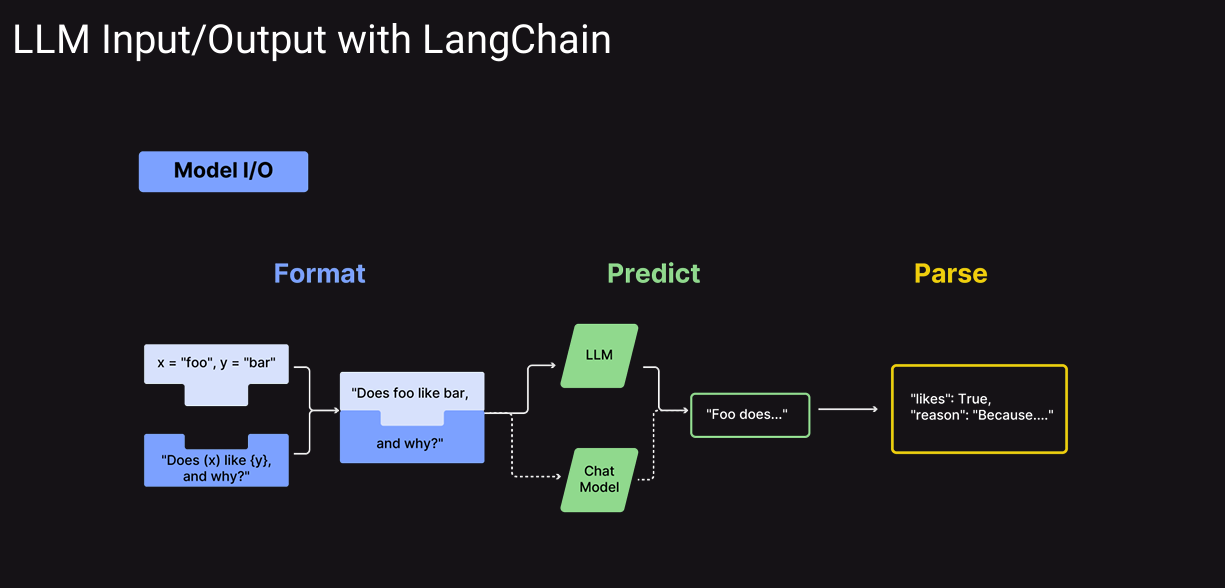

# Model I/O

In LangChain, the central part of any application is the language model. This module provides crucial tools for working effectively with any language model, ensuring it integrates smoothly and communicates well.

### Key Components of Model I/O

**LLMs and Chat Models (used interchangeably):**
- **LLMs:**
  - **Definition:** Pure text completion models.
  - **Input/Output:** Receives a text string and returns a text string.
- **Chat Models:**
  - **Definition:** Based on a language model but with different input and output types.
  - **Input/Output:** Takes a list of chat messages as input and produces a chat message as output.


## Chat Models and LLMs

Large Language Models (LLMs) are a core component of LangChain. LangChain does not implement or build its own LLMs. It provides a standard API for interacting with almost every LLM out there.

There are lots of LLM providers (OpenAI, Hugging Face, etc) - the LLM class is designed to provide a standard interface for all of them.


### Accessing ChatGPT as an LLM


In [ ]:
# recent ==< 

In [5]:
from langchain_openai import OpenAI

llm = OpenAI(model_name="gpt-3.5-turbo-instruct", temperature=0)
prompt_txt = "{query}"
prompt_template = ChatPromptTemplate.from_template(prompt_txt)
chain = prompt_template | llm | StrOutputParser()
response = chatgpt.invoke('Explain what is bakchodi in 3 bullet points in hindi')
print(response.content)

- **बकचोदी का अर्थ**: बकचोदी एक हिंदी शब्द है जिसका उपयोग आमतौर पर बेकार की बातें करने, मजाक करने या हल्की-फुल्की बातचीत के लिए किया जाता है। 

- **सामाजिक संदर्भ**: यह शब्द अक्सर दोस्तों या करीबी लोगों के बीच मजाक-मस्ती के लिए इस्तेमाल होता है, जहाँ गंभीरता की बजाय हंसी-मजाक पर जोर दिया जाता है।

- **संस्कृति में स्थान**: बकचोदी भारतीय संस्कृति में एक सामान्य व्यवहार है, जहाँ लोग एक-दूसरे के साथ समय बिताते हुए हल्के-फुल्के और मनोरंजक संवाद करते हैं।


### Accessing ChatGPT as an Chat Model LLM
 ### Refer first code block

### Accessing Open LLMs with HuggingFace Serverless API

The free [serverless API](https://huggingface.co/inference-api/serverless) lets you implement solutions and iterate in no time, but it may be rate limited for heavy use cases, since the loads are shared with other requests.

For enterprise workloads, you can use Inference Endpoints - Dedicated which would be hosted on a specific cloud instance of your choice and would have a cost associated with it. Here we will use the free serverless API which works quite well in most cases.

The advantage is you do not need to download the models or run them locally on a GPU compute infrastructure which takes time and also would cost you a fair amount.

#### Accessing Microsoft Phi-3 Mini Instruct

The Phi-3-Mini-4K-Instruct is a 3.8B parameters, lightweight, state-of-the-art open model trained with the Phi-3 datasets that includes both synthetic data and the filtered publicly available websites data with a focus on high-quality and reasoning dense properties. Check more details [here](https://huggingface.co/microsoft/Phi-3-mini-4k-instruct)

In [20]:
# API_URL doesn't work now, so we are using repo_id of the model
repo_id = "microsoft/Phi-3-mini-4k-instruct"

phi3_params = {
                  "wait_for_model": True, # waits if model is not available in Hugginface serve
                  "do_sample": False, # greedy decoding - temperature = 0
                  "return_full_text": False, # don't return input prompt
                  "max_new_tokens": 1000, # max tokens answer can go upto
                }

llm = HuggingFaceEndpoint(
    repo_id=repo_id,
    # max_length=128,
    temperature=0.5,
    # huggingfacehub_api_token=HUGGINGFACEHUB_API_TOKEN,
   **phi3_params
)

WARNING! wait_for_model is not default parameter.
                    wait_for_model was transferred to model_kwargs.
                    Please make sure that wait_for_model is what you intended.
c:\Users\Rahul\Documents\FREELANCING\1.AppliedSkil\Gen_AI_learning\ai-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
# Phi3 expects input prompt to be formatted in a specific way
# check more details here: https://huggingface.co/microsoft/Phi-3-mini-4k-instruct
phi3_prompt = """<|user|>Explain what is bakchodi in 3 bullet points in hindi<|end|>
<|assistant|>"""
response = llm.invoke(phi3_prompt)
print(response)


1. बकचोड़ी एक प्रकार का स्थानीय मध्य भारतीय संस्थान है, जिसमें उन लोगों की जाने के लिए उपलब्ध उद्यम हैं।
2. बकचोड़ी में विभिन्न कार्यक्रमों का उपलब्धि है, जैसे कि स्थानीय मार्गों को बनाने, गावों की सुरक्षा और सामाजिक संबंधों को बनाने के लिए।
3. बकचोड़ी के स्थानीय संस्थानों में स्थानीय समाज की समर्थन और समर्थन के लिए जाने का काम करते हैं, जिसमें स्थानीय लोगों को समर्थन और समर्थन के लिए मदद करते हैं।


In [7]:
gemma_repo_id = "google/gemma-1.1-2b-it"

gemma_params = {
                  "wait_for_model": True, # waits if model is not available in Hugginface serve
                  "do_sample": False, # greedy decoding - temperature = 0
                  "return_full_text": False, # don't return input prompt
                  "max_new_tokens": 1000, # max tokens answer can go upto
                }

llm = HuggingFaceEndpoint(
    repo_id=gemma_repo_id,
    **gemma_params
)

WARNING! wait_for_model is not default parameter.
                    wait_for_model was transferred to model_kwargs.
                    Please make sure that wait_for_model is what you intended.
c:\Users\Rahul\Documents\FREELANCING\1.AppliedSkil\Gen_AI_learning\ai-env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
prompt = """Explain what is bakchodi in 3 bullet points in hindi"""

In [9]:
response = llm.invoke(prompt)
print(response)

.

बखचीड एक ऐसी तकनीक है जो आत्मनिर्भरता और आत्मविश्वास को बढ़ाता है।


# Prompting with Prompt Templates for LLM Input / Output with LangChain

## Prompt Templates
Prompt templates are pre-designed formats used to generate prompts for language models. These templates can include instructions, few-shot examples, and specific contexts and questions suited for particular tasks.

LangChain provides tools for creating and using prompt templates. It aims to develop model-agnostic templates to facilitate the reuse of existing templates across different language models. Typically, these models expect prompts in the form of either a string or a list of chat messages.

### Types of Prompt Templates

- **PromptTemplate:**
  - Used for creating string-based prompts.
  - Utilizes Python's `str.format` syntax for templating, supporting any number of variables, including scenarios with no variables.

- **ChatPromptTemplate:**
  - Designed for chat models, where the prompt consists of a list of chat messages.
  - Each chat message includes content and a role parameter. For instance, in the OpenAI Chat Completions API, a chat message could be assigned to an AI assistant, a human, or a system role.
- **FewShotChatMessagePromptTemplate**
  - A few-shot prompt template can be constructed from a set of examples


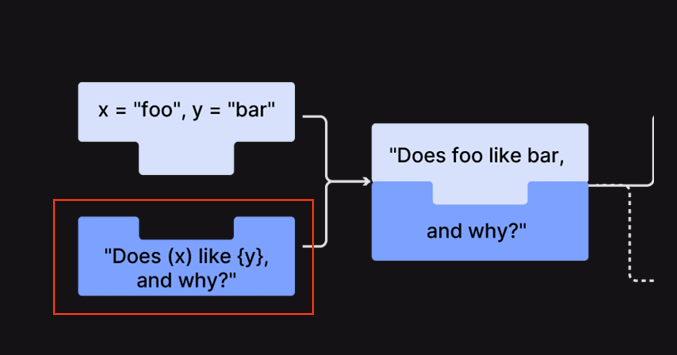

### PromptTemplate

We can use `PromptTemplate` to create a template for a string prompt.

By default, `PromptTemplate` uses Python's `str.format` syntax for templating.

You can create custom prompt templates that format the prompt in any way you want. For more information, see [Prompt Template Composition](https://python.langchain.com/v0.1/docs/modules/model_io/prompts/composition/).

In [11]:
# Simple prompt

prompt = """Explain to me what is Generative AI in 3 bullet points?"""
prompt_template = PromptTemplate.from_template(prompt) #https://python.langchain.com/api_reference/core/index.html
prompt_template

PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='Explain to me what is Generative AI in 3 bullet points?')

In [13]:
response = llm.invoke(prompt_template.format())
print(response.content)

ConnectionError: (ProtocolError('Connection aborted.', RemoteDisconnected('Remote end closed connection without response')), '(Request ID: 2684e8e0-5f50-4ba3-a2bb-b90249789797)')